In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
            'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


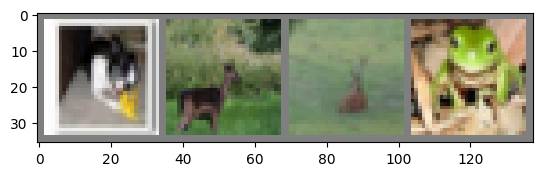

dog   deer  deer  frog 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from pytorch_mlp import MLP

# 数据增强和标准化
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# 加载 CIFAR-10 数据集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
from pytorch_mlp import MLP
import numpy as np

# 检查是否有可用的 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 数据增强和标准化
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# 加载 CIFAR-10 数据集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# 定义模型
model = MLP(n_inputs=3*32*32, n_hidden=[512, 256, 128], n_classes=10, dropout=0.1).to(device)

# 定义损失函数
criterion = torch.nn.CrossEntropyLoss()

# 定义优化器
optimiser = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

# 早停参数
patience = 10  # 如果验证损失在连续10个epoch内没有改善，则停止训练
best_loss = np.inf
epochs_no_improve = 0

# 训练模型
n_epochs = 500

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.view(-1, 3*32*32).to(device), labels.to(device)
        optimiser.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()
        running_loss += loss.item()
        if i % 200 == 199:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

    # 验证模型
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.view(-1, 3*32*32).to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(testloader)

    print(f'Epoch {epoch + 1}, Validation Loss: {val_loss:.3f}')

    # 检查是否早停
    if val_loss < best_loss:
        best_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print('Early stopping!')
        break

print('Finished Training')

# 测试模型
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.view(-1, 3*32*32).to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

Files already downloaded and verified
Files already downloaded and verified
[1,   200] loss: 1.919
Epoch 1, Validation Loss: 1.712
[2,   200] loss: 1.725
Epoch 2, Validation Loss: 1.615
[3,   200] loss: 1.649
Epoch 3, Validation Loss: 1.571
[4,   200] loss: 1.603
Epoch 4, Validation Loss: 1.519
[5,   200] loss: 1.573
Epoch 5, Validation Loss: 1.500
[6,   200] loss: 1.545
Epoch 6, Validation Loss: 1.505
[7,   200] loss: 1.533
Epoch 7, Validation Loss: 1.477
[8,   200] loss: 1.511
Epoch 8, Validation Loss: 1.458
[9,   200] loss: 1.499
Epoch 9, Validation Loss: 1.443
[10,   200] loss: 1.476
Epoch 10, Validation Loss: 1.436
[11,   200] loss: 1.469
Epoch 11, Validation Loss: 1.421
[12,   200] loss: 1.454
Epoch 12, Validation Loss: 1.423
[13,   200] loss: 1.461
Epoch 13, Validation Loss: 1.408
[14,   200] loss: 1.446
Epoch 14, Validation Loss: 1.409
[15,   200] loss: 1.435
Epoch 15, Validation Loss: 1.402
[16,   200] loss: 1.422
Epoch 16, Validation Loss: 1.392
[17,   200] loss: 1.417
Epoch 

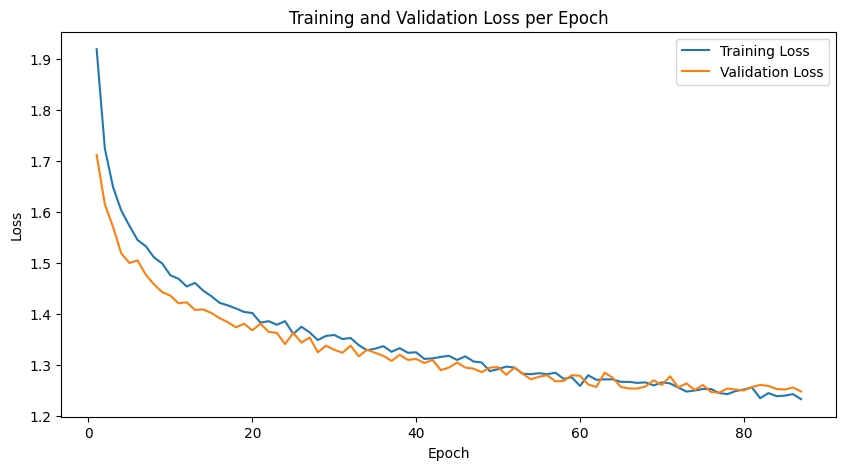

In [15]:
import re
import matplotlib.pyplot as plt

# output of the last cell
data = """
[1,   200] loss: 1.919
Epoch 1, Validation Loss: 1.712
[2,   200] loss: 1.725
Epoch 2, Validation Loss: 1.615
[3,   200] loss: 1.649
Epoch 3, Validation Loss: 1.571
[4,   200] loss: 1.603
Epoch 4, Validation Loss: 1.519
[5,   200] loss: 1.573
Epoch 5, Validation Loss: 1.500
[6,   200] loss: 1.545
Epoch 6, Validation Loss: 1.505
[7,   200] loss: 1.533
Epoch 7, Validation Loss: 1.477
[8,   200] loss: 1.511
Epoch 8, Validation Loss: 1.458
[9,   200] loss: 1.499
Epoch 9, Validation Loss: 1.443
[10,   200] loss: 1.476
Epoch 10, Validation Loss: 1.436
[11,   200] loss: 1.469
Epoch 11, Validation Loss: 1.421
[12,   200] loss: 1.454
Epoch 12, Validation Loss: 1.423
[13,   200] loss: 1.461
Epoch 13, Validation Loss: 1.408
[14,   200] loss: 1.446
Epoch 14, Validation Loss: 1.409
[15,   200] loss: 1.435
Epoch 15, Validation Loss: 1.402
[16,   200] loss: 1.422
Epoch 16, Validation Loss: 1.392
[17,   200] loss: 1.417
Epoch 17, Validation Loss: 1.384
[18,   200] loss: 1.411
Epoch 18, Validation Loss: 1.374
[19,   200] loss: 1.404
Epoch 19, Validation Loss: 1.381
[20,   200] loss: 1.402
Epoch 20, Validation Loss: 1.368
[21,   200] loss: 1.383
Epoch 21, Validation Loss: 1.381
[22,   200] loss: 1.386
Epoch 22, Validation Loss: 1.365
[23,   200] loss: 1.379
Epoch 23, Validation Loss: 1.363
[24,   200] loss: 1.386
Epoch 24, Validation Loss: 1.341
[25,   200] loss: 1.361
Epoch 25, Validation Loss: 1.363
[26,   200] loss: 1.375
Epoch 26, Validation Loss: 1.344
[27,   200] loss: 1.364
Epoch 27, Validation Loss: 1.354
[28,   200] loss: 1.349
Epoch 28, Validation Loss: 1.325
[29,   200] loss: 1.357
Epoch 29, Validation Loss: 1.338
[30,   200] loss: 1.359
Epoch 30, Validation Loss: 1.330
[31,   200] loss: 1.351
Epoch 31, Validation Loss: 1.324
[32,   200] loss: 1.353
Epoch 32, Validation Loss: 1.338
[33,   200] loss: 1.339
Epoch 33, Validation Loss: 1.317
[34,   200] loss: 1.329
Epoch 34, Validation Loss: 1.330
[35,   200] loss: 1.332
Epoch 35, Validation Loss: 1.324
[36,   200] loss: 1.337
Epoch 36, Validation Loss: 1.318
[37,   200] loss: 1.326
Epoch 37, Validation Loss: 1.308
[38,   200] loss: 1.333
Epoch 38, Validation Loss: 1.320
[39,   200] loss: 1.324
Epoch 39, Validation Loss: 1.310
[40,   200] loss: 1.325
Epoch 40, Validation Loss: 1.312
[41,   200] loss: 1.312
Epoch 41, Validation Loss: 1.304
[42,   200] loss: 1.313
Epoch 42, Validation Loss: 1.310
[43,   200] loss: 1.316
Epoch 43, Validation Loss: 1.290
[44,   200] loss: 1.318
Epoch 44, Validation Loss: 1.295
[45,   200] loss: 1.310
Epoch 45, Validation Loss: 1.305
[46,   200] loss: 1.317
Epoch 46, Validation Loss: 1.295
[47,   200] loss: 1.307
Epoch 47, Validation Loss: 1.293
[48,   200] loss: 1.305
Epoch 48, Validation Loss: 1.286
[49,   200] loss: 1.288
Epoch 49, Validation Loss: 1.295
[50,   200] loss: 1.292
Epoch 50, Validation Loss: 1.296
[51,   200] loss: 1.297
Epoch 51, Validation Loss: 1.281
[52,   200] loss: 1.295
Epoch 52, Validation Loss: 1.295
[53,   200] loss: 1.283
Epoch 53, Validation Loss: 1.283
[54,   200] loss: 1.282
Epoch 54, Validation Loss: 1.272
[55,   200] loss: 1.284
Epoch 55, Validation Loss: 1.277
[56,   200] loss: 1.282
Epoch 56, Validation Loss: 1.280
[57,   200] loss: 1.285
Epoch 57, Validation Loss: 1.268
[58,   200] loss: 1.273
Epoch 58, Validation Loss: 1.269
[59,   200] loss: 1.276
Epoch 59, Validation Loss: 1.280
[60,   200] loss: 1.259
Epoch 60, Validation Loss: 1.279
[61,   200] loss: 1.280
Epoch 61, Validation Loss: 1.262
[62,   200] loss: 1.271
Epoch 62, Validation Loss: 1.257
[63,   200] loss: 1.272
Epoch 63, Validation Loss: 1.285
[64,   200] loss: 1.272
Epoch 64, Validation Loss: 1.275
[65,   200] loss: 1.267
Epoch 65, Validation Loss: 1.257
[66,   200] loss: 1.267
Epoch 66, Validation Loss: 1.254
[67,   200] loss: 1.265
Epoch 67, Validation Loss: 1.254
[68,   200] loss: 1.266
Epoch 68, Validation Loss: 1.258
[69,   200] loss: 1.260
Epoch 69, Validation Loss: 1.270
[70,   200] loss: 1.266
Epoch 70, Validation Loss: 1.261
[71,   200] loss: 1.264
Epoch 71, Validation Loss: 1.278
[72,   200] loss: 1.256
Epoch 72, Validation Loss: 1.256
[73,   200] loss: 1.248
Epoch 73, Validation Loss: 1.264
[74,   200] loss: 1.250
Epoch 74, Validation Loss: 1.251
[75,   200] loss: 1.253
Epoch 75, Validation Loss: 1.261
[76,   200] loss: 1.253
Epoch 76, Validation Loss: 1.247
[77,   200] loss: 1.245
Epoch 77, Validation Loss: 1.246
[78,   200] loss: 1.243
Epoch 78, Validation Loss: 1.254
[79,   200] loss: 1.249
Epoch 79, Validation Loss: 1.252
[80,   200] loss: 1.252
Epoch 80, Validation Loss: 1.250
[81,   200] loss: 1.256
Epoch 81, Validation Loss: 1.257
[82,   200] loss: 1.235
Epoch 82, Validation Loss: 1.261
[83,   200] loss: 1.245
Epoch 83, Validation Loss: 1.259
[84,   200] loss: 1.239
Epoch 84, Validation Loss: 1.253
[85,   200] loss: 1.240
Epoch 85, Validation Loss: 1.252
[86,   200] loss: 1.243
Epoch 86, Validation Loss: 1.256
[87,   200] loss: 1.233
Epoch 87, Validation Loss: 1.248
...
"""

# 用正则表达式解析出epoch和loss
train_pattern = r"\[(\d+),\s+\d+\] loss: ([\d.]+)"
val_pattern = r"Epoch (\d+), Validation Loss: ([\d.]+)"

epochs = []
train_losses = []
val_losses = []

for match in re.finditer(train_pattern, data):
    epochs.append(int(match.group(1)))
    train_losses.append(float(match.group(2)))

for match in re.finditer(val_pattern, data):
    val_losses.append(float(match.group(2)))

# 绘制图表
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.savefig('images/cifar_loss.pdf')
plt.show()